In [2]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [5]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [6]:
df = pd.read_excel('Silver_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

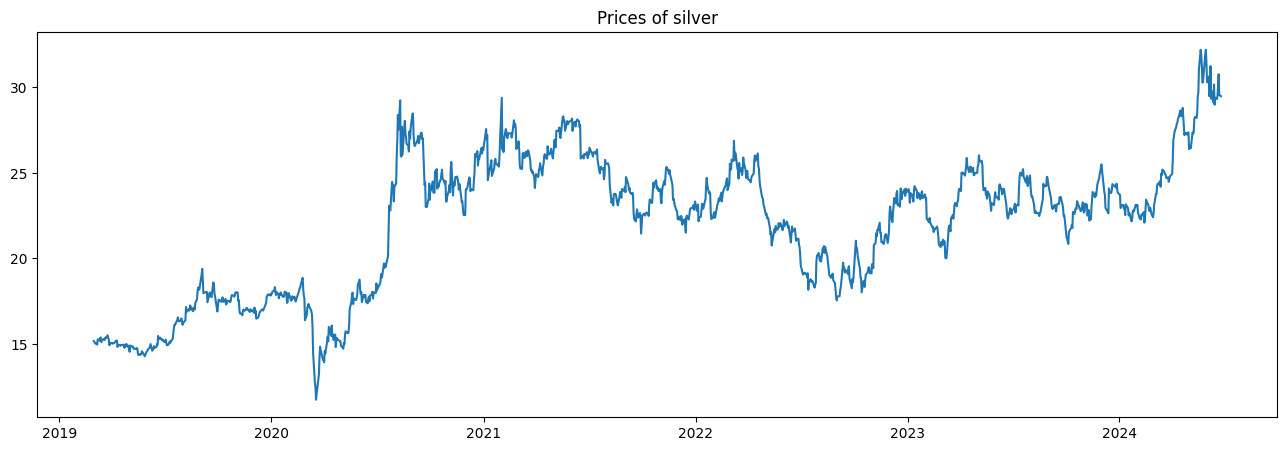

In [7]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of silver')
    plt.show()

In [8]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,15.555000,15.575000,15.080000,15.169000,585
2019-03-04,2019-03-04,15.170000,15.205000,15.005000,15.017000,317
2019-03-05,2019-03-05,15.025000,15.075000,15.005000,15.020000,222
2019-03-06,2019-03-06,15.025000,15.025000,14.975000,15.003000,25
2019-03-07,2019-03-07,15.025000,15.025000,14.920000,14.960000,8
...,...,...,...,...,...,...
2024-06-17,2024-06-17,29.325001,29.325001,29.325001,29.325001,0
2024-06-18,2024-06-18,29.004999,29.504999,28.955000,29.504999,66
2024-06-20,2024-06-20,29.500000,30.775999,29.500000,30.775999,20
2024-06-21,2024-06-21,30.500000,30.510000,29.573000,29.573000,20


In [9]:
# Split dataset 

In [10]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [11]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [12]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [13]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.19010, saving model to save_model_7_2_1.keras
17/17 - 3s - 183ms/step - loss: 0.1901
Epoch 2/80

Epoch 2: loss improved from 0.19010 to 0.06671, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0667
Epoch 3/80

Epoch 3: loss improved from 0.06671 to 0.04706, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0471
Epoch 4/80

Epoch 4: loss improved from 0.04706 to 0.04428, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0443
Epoch 5/80

Epoch 5: loss improved from 0.04428 to 0.04264, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0426
Epoch 6/80

Epoch 6: loss improved from 0.04264 to 0.04070, saving model to save_model_7_2_1.keras
17/17 - 1s - 48ms/step - loss: 0.0407
Epoch 7/80

Epoch 7: loss did not improve from 0.04070
17/17 - 1s - 46ms/step - loss: 0.0453
Epoch 8/80

Epoch 8: loss did not improve from 0.04070
17/17 - 1s - 46ms/step - loss: 0.0423
Epoch 

In [14]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Original y_train shape: (836, 1)
Predicted y_train shape: (836, 1)


In [15]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [17]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [18]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.848379909992218], [0.8365630507469177], [0.823405921459198], [0.8114073872566223], [0.7999255061149597], [0.7885981798171997], [0.7773348093032837], [0.766140878200531], [0.7550710439682007], [0.7442019581794739], [0.7336091995239258], [0.7233562469482422], [0.7134900093078613], [0.704039990901947], [0.6950210332870483], [0.6864368319511414], [0.6782826781272888], [0.6705468893051147], [0.6632144451141357], [0.6562662720680237], [0.6496821045875549], [0.6434400677680969], [0.6375173330307007], [0.6318909525871277], [0.6265383958816528], [0.6214367747306824], [0.6165646314620972], [0.6119014024734497], [0.6074273586273193], [0.6031246781349182]]


In [19]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [20]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.10133826]
 [28.85944712]
 [28.59012066]
 [28.34451064]
 [28.10947651]
 [27.87760611]
 [27.64704489]
 [27.4179051 ]
 [27.19130557]
 [26.96881536]
 [26.75198157]
 [26.5421036 ]
 [26.3401417 ]
 [26.1466998 ]
 [25.96208172]
 [25.7863631 ]
 [25.61944755]
 [25.46109594]
 [25.31100079]
 [25.16877167]
 [25.03399375]
 [24.90621924]
 [24.78498085]
 [24.66980883]
 [24.56024198]
 [24.45581179]
 [24.356079  ]
 [24.2606227 ]
 [24.16903901]
 [24.08096313]]


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

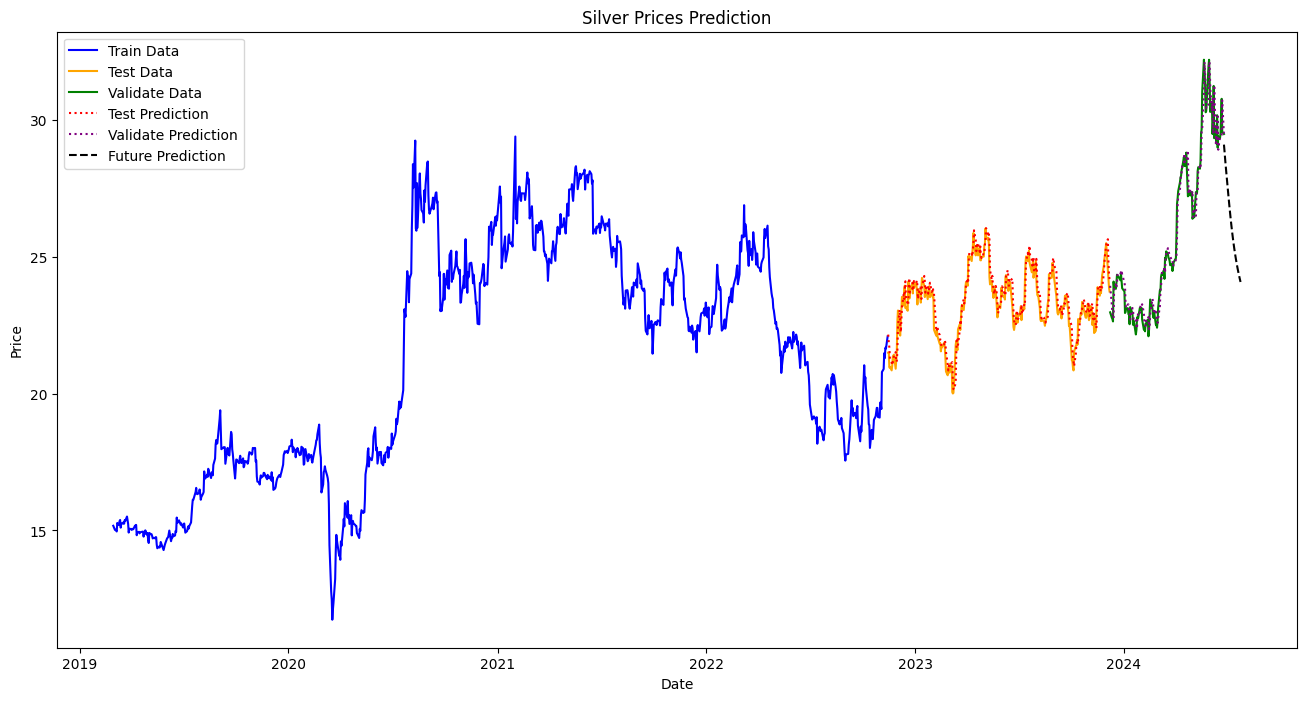

In [22]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 2.2562368223360107
Lower Bound of Future Prediction: [[26.64179619]
 [26.27001244]
 [25.97880946]
 [25.75790661]
 [25.57305426]
 [25.39833613]
 [25.2207056 ]
 [25.03715268]
 [24.85044211]
 [24.66544335]
 [24.48667569]
 [24.31724184]
 [24.15867305]
 [24.0112902 ]
 [23.87467723]
 [23.74809965]
 [23.63078146]
 [23.52202477]
 [23.42124635]
 [23.32797403]
 [23.24179176]
 [23.16231398]
 [23.08917465]
 [23.02198579]
 [22.96037525]
 [22.90396604]
 [22.85238601]
 [22.80529353]
 [22.76234941]
 [22.72324864]]
Upper Bound of Future Prediction: [[31.15426984]
 [30.78248609]
 [30.4912831 ]
 [30.27038025]
 [30.08552791]
 [29.91080978]
 [29.73317925]
 [29.54962632]
 [29.36291575]
 [29.177917  ]
 [28.99914933]
 [28.82971548]
 [28.67114669]
 [28.52376384]
 [28.38715088]
 [28.26057329]
 [28.14325511]
 [28.03449841]
 [27.93371999]
 [27.84044768]
 [27.75426541]
 [27.67478762]
 [27.6016483 ]
 [27.53445943]
 [27.4728489 ]
 [27.41643968]
 [27.36485965]
 [27.31776717]
 [27.27482306]
 [27.23572

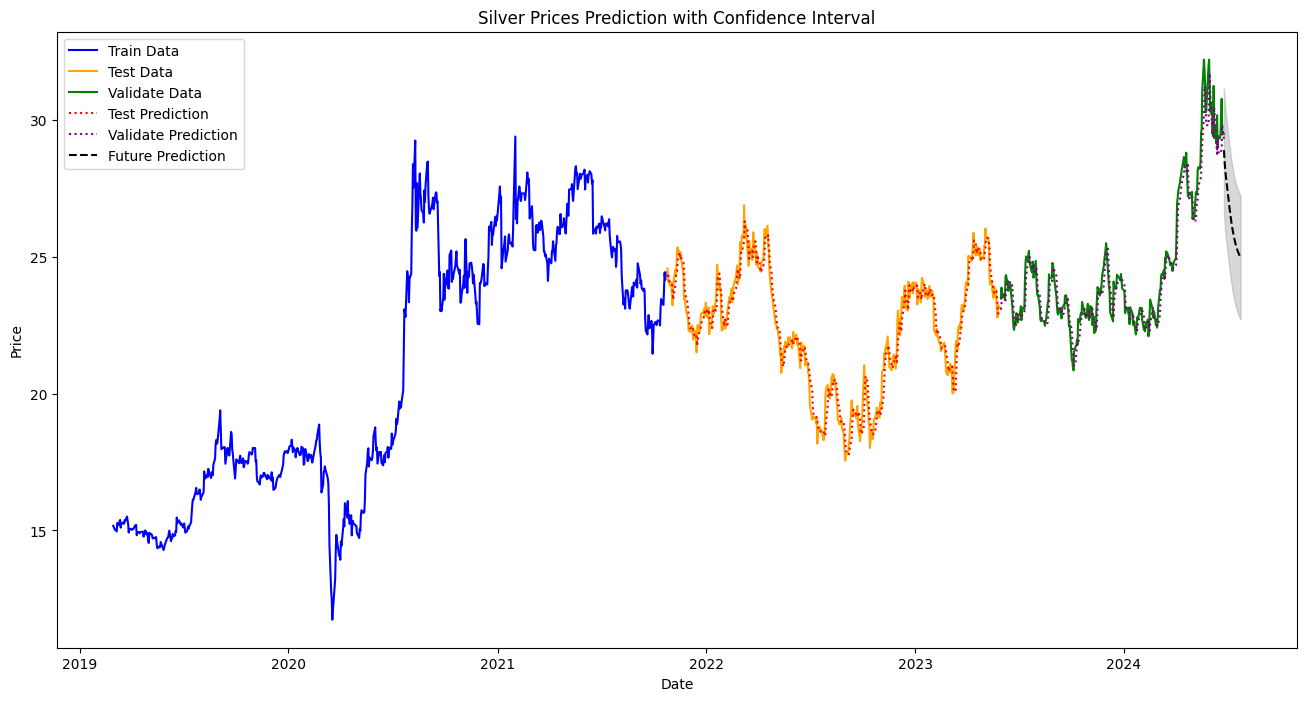

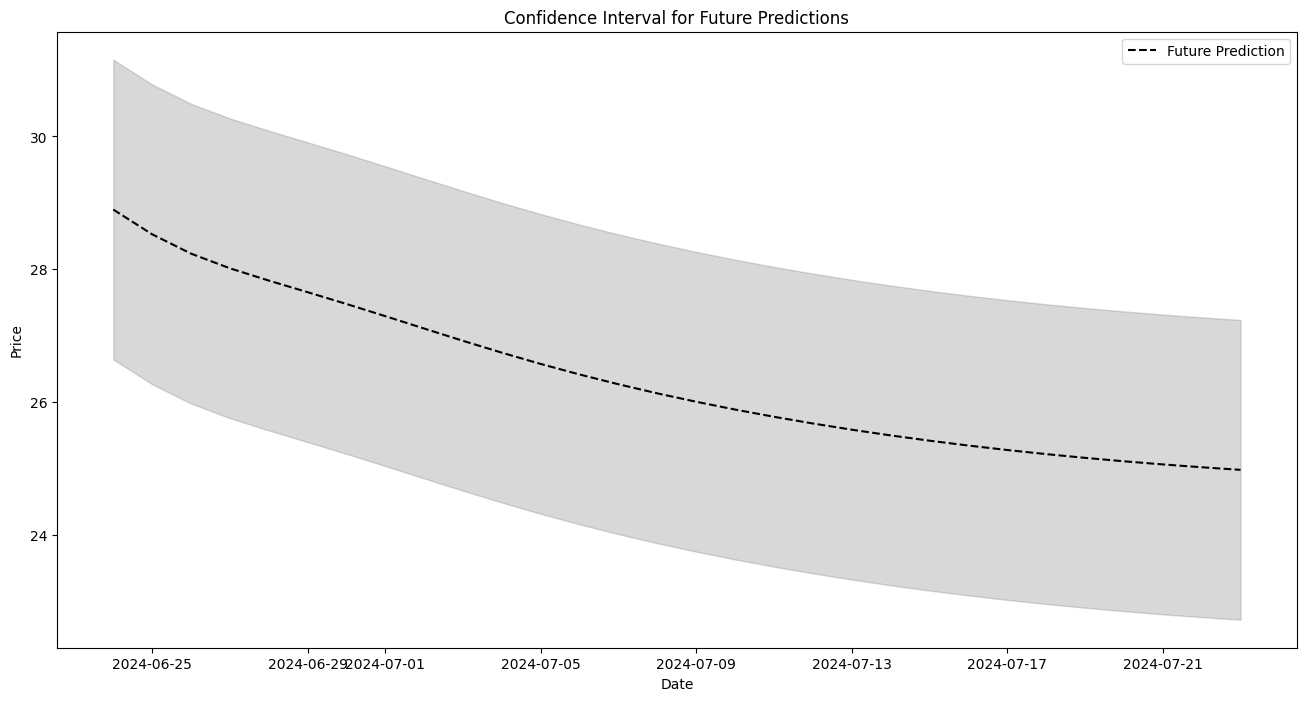

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [25]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.32582636629597517
MAPE:  1.4113417809215618
RMSE:  0.42134222421420847

** Validate **
MAE:  0.3863148583306207
MAPE:  1.4619824395231593
RMSE:  0.5521218790198826


In [26]:
# Split dataset 6-3-1

In [27]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [28]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [29]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.19734, saving model to save_model_6_3_1.keras
15/15 - 3s - 191ms/step - loss: 0.1973
Epoch 2/80

Epoch 2: loss improved from 0.19734 to 0.07320, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0732
Epoch 3/80

Epoch 3: loss improved from 0.07320 to 0.05011, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0501
Epoch 4/80

Epoch 4: loss did not improve from 0.05011
15/15 - 1s - 46ms/step - loss: 0.0525
Epoch 5/80

Epoch 5: loss improved from 0.05011 to 0.04560, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0456
Epoch 6/80

Epoch 6: loss did not improve from 0.04560
15/15 - 1s - 46ms/step - loss: 0.0493
Epoch 7/80

Epoch 7: loss improved from 0.04560 to 0.04449, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0445
Epoch 8/80

Epoch 8: loss improved from 0.04449 to 0.04302, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0430
Epoch 

In [31]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [32]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [33]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [35]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8710061311721802], [0.8822420835494995], [0.8907201886177063], [0.8955283164978027], [0.8982545137405396], [0.9003721475601196], [0.9024882912635803], [0.9046097993850708], [0.9065883159637451], [0.9083482623100281], [0.9099104404449463], [0.9113361835479736], [0.9126834273338318], [0.9139900207519531], [0.9152769446372986], [0.9165541529655457], [0.9178263545036316], [0.9190942049026489], [0.9203550815582275], [0.9216034412384033], [0.9228338003158569], [0.9240391850471497], [0.9252135157585144], [0.9263522028923035], [0.9274507761001587], [0.9285074472427368], [0.9295209050178528], [0.9304912090301514], [0.9314194917678833], [0.9323073625564575]]


In [36]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [37]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.56449706]
 [29.79449703]
 [29.96804385]
 [30.06646624]
 [30.12227151]
 [30.16561947]
 [30.20893694]
 [30.25236422]
 [30.29286446]
 [30.32889056]
 [30.36086835]
 [30.39005332]
 [30.4176314 ]
 [30.44437737]
 [30.4707207 ]
 [30.49686516]
 [30.52290713]
 [30.54886003]
 [30.57467018]
 [30.6002241 ]
 [30.62540956]
 [30.65008378]
 [30.67412234]
 [30.69743126]
 [30.71991906]
 [30.74154912]
 [30.7622946 ]
 [30.78215673]
 [30.80115868]
 [30.8193334 ]]


In [38]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

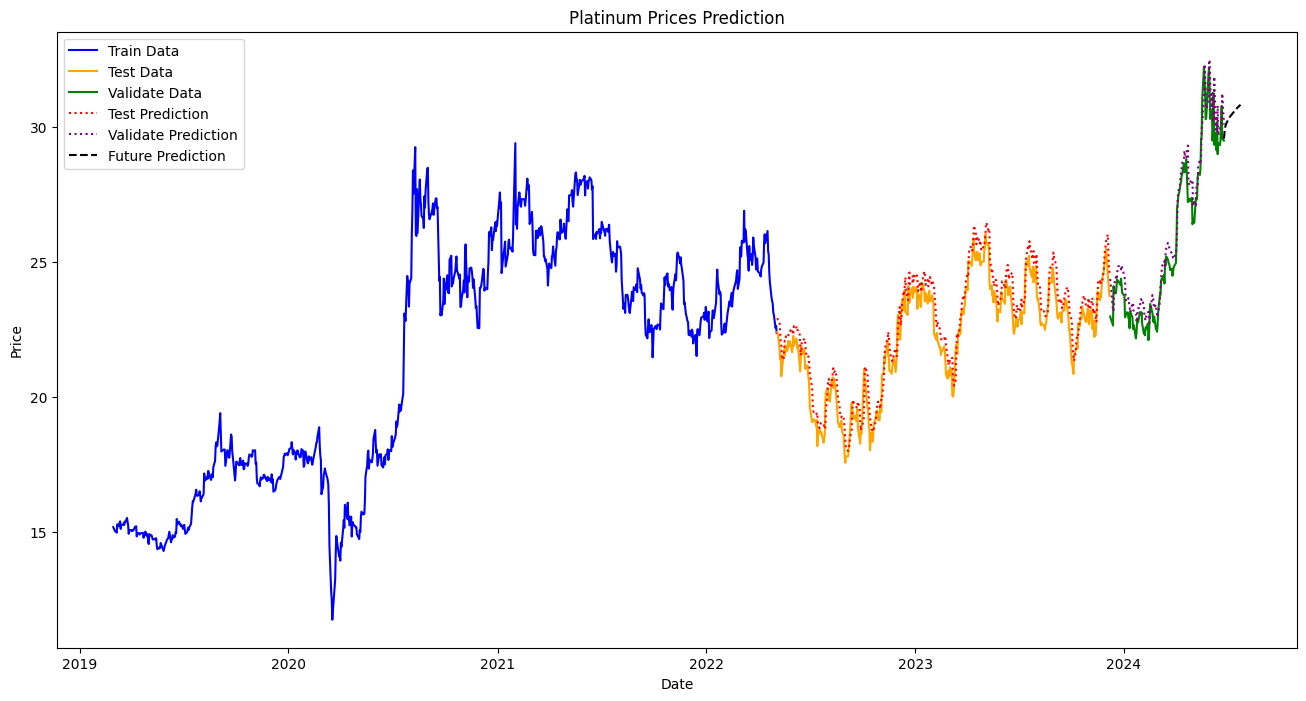

In [39]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 2.2562368223360107
Lower Bound of Future Prediction: [[26.64179619]
 [26.27001244]
 [25.97880946]
 [25.75790661]
 [25.57305426]
 [25.39833613]
 [25.2207056 ]
 [25.03715268]
 [24.85044211]
 [24.66544335]
 [24.48667569]
 [24.31724184]
 [24.15867305]
 [24.0112902 ]
 [23.87467723]
 [23.74809965]
 [23.63078146]
 [23.52202477]
 [23.42124635]
 [23.32797403]
 [23.24179176]
 [23.16231398]
 [23.08917465]
 [23.02198579]
 [22.96037525]
 [22.90396604]
 [22.85238601]
 [22.80529353]
 [22.76234941]
 [22.72324864]]
Upper Bound of Future Prediction: [[31.15426984]
 [30.78248609]
 [30.4912831 ]
 [30.27038025]
 [30.08552791]
 [29.91080978]
 [29.73317925]
 [29.54962632]
 [29.36291575]
 [29.177917  ]
 [28.99914933]
 [28.82971548]
 [28.67114669]
 [28.52376384]
 [28.38715088]
 [28.26057329]
 [28.14325511]
 [28.03449841]
 [27.93371999]
 [27.84044768]
 [27.75426541]
 [27.67478762]
 [27.6016483 ]
 [27.53445943]
 [27.4728489 ]
 [27.41643968]
 [27.36485965]
 [27.31776717]
 [27.27482306]
 [27.23572

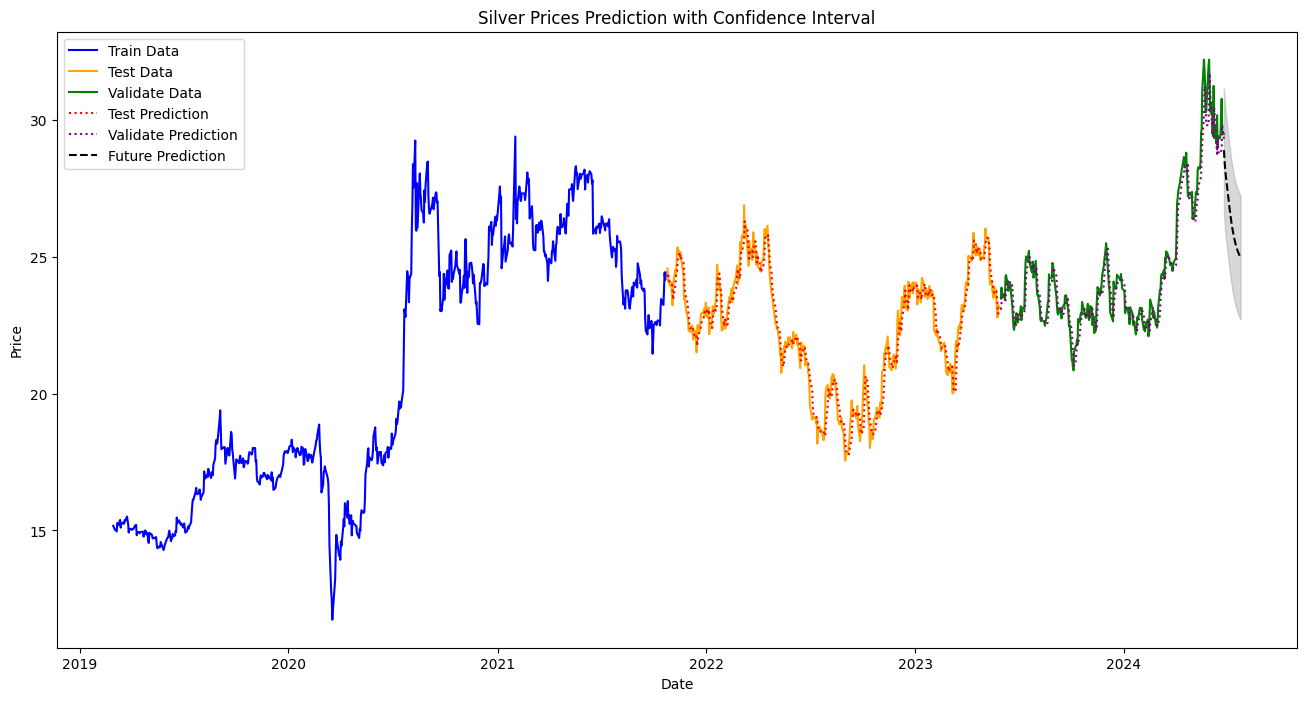

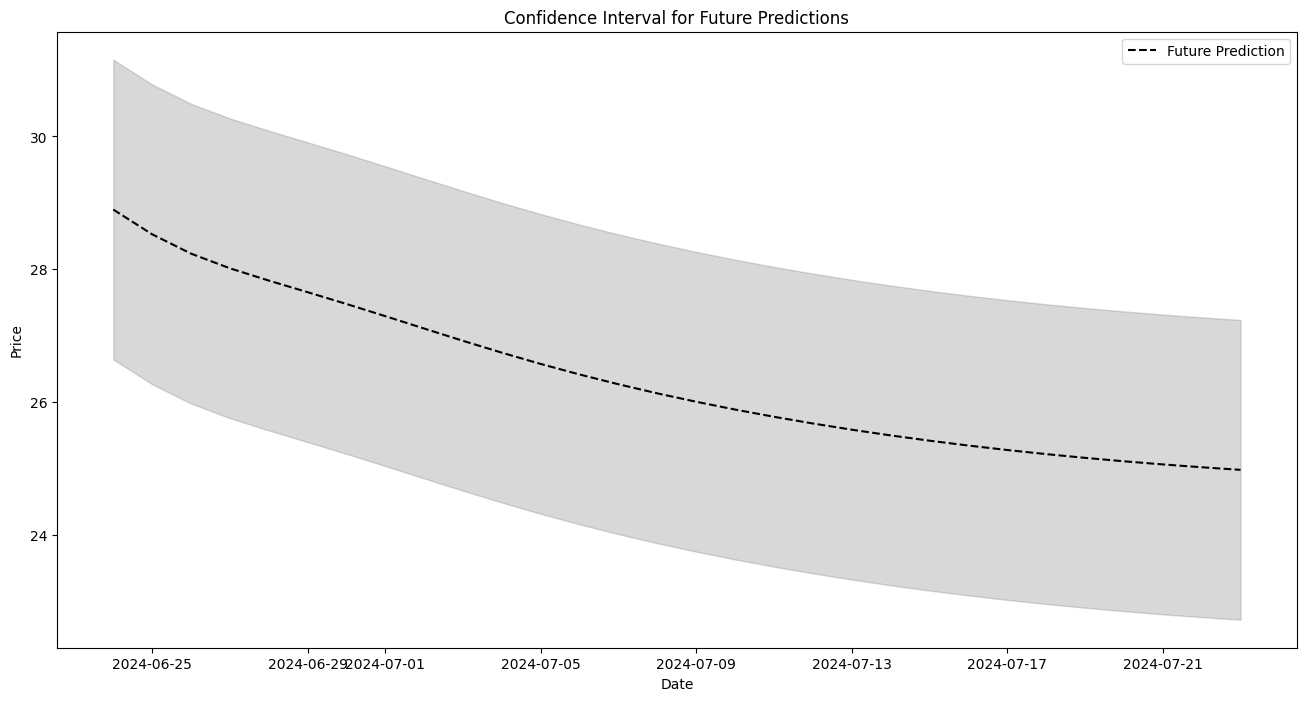

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [41]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.5437037498873662
MAPE:  2.4736468366242574
RMSE:  0.6427781401687911

** Validate **
MAE:  0.5948516421847871
MAPE:  2.3187885479030066
RMSE:  0.7216356223567577


In [42]:
# Split dataset 5-3-2 

In [43]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [44]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [45]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [46]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.20310, saving model to save_model_5_3_2.keras
12/12 - 3s - 228ms/step - loss: 0.2031
Epoch 2/80

Epoch 2: loss improved from 0.20310 to 0.09107, saving model to save_model_5_3_2.keras
12/12 - 1s - 44ms/step - loss: 0.0911
Epoch 3/80

Epoch 3: loss improved from 0.09107 to 0.06499, saving model to save_model_5_3_2.keras
12/12 - 1s - 45ms/step - loss: 0.0650
Epoch 4/80

Epoch 4: loss improved from 0.06499 to 0.05301, saving model to save_model_5_3_2.keras
12/12 - 1s - 45ms/step - loss: 0.0530
Epoch 5/80

Epoch 5: loss did not improve from 0.05301
12/12 - 1s - 43ms/step - loss: 0.0544
Epoch 6/80

Epoch 6: loss improved from 0.05301 to 0.04579, saving model to save_model_5_3_2.keras
12/12 - 1s - 45ms/step - loss: 0.0458
Epoch 7/80

Epoch 7: loss did not improve from 0.04579
12/12 - 1s - 43ms/step - loss: 0.0465
Epoch 8/80

Epoch 8: loss improved from 0.04579 to 0.04553, saving model to save_model_5_3_2.keras
12/12 - 1s - 45ms/step - loss: 0.0455
Epoch 

In [47]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [48]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [49]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [50]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [51]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8384480476379395], [0.8202856779098511], [0.8060598373413086], [0.7952682971954346], [0.786237895488739], [0.7777025699615479], [0.7690249681472778], [0.7600580453872681], [0.7509368658065796], [0.741899311542511], [0.7331661581993103], [0.7248889803886414], [0.7171425819396973], [0.709942638874054], [0.703268826007843], [0.6970852613449097], [0.6913540363311768], [0.6860410571098328], [0.681117832660675], [0.6765612959861755], [0.6723511219024658], [0.6684684753417969], [0.6648954749107361], [0.6616131663322449], [0.6586033701896667], [0.6558476686477661], [0.6533278822898865], [0.6510273218154907], [0.6489294171333313], [0.6470192670822144]]


In [52]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [53]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[28.89803301]
 [28.52624927]
 [28.23504628]
 [28.01414343]
 [27.82929109]
 [27.65457295]
 [27.47694243]
 [27.2933895 ]
 [27.10667893]
 [26.92168018]
 [26.74291251]
 [26.57347866]
 [26.41490987]
 [26.26752702]
 [26.13091405]
 [26.00433647]
 [25.88701828]
 [25.77826159]
 [25.67748317]
 [25.58421086]
 [25.49802858]
 [25.4185508 ]
 [25.34541147]
 [25.27822261]
 [25.21661208]
 [25.16020286]
 [25.10862283]
 [25.06153035]
 [25.01858624]
 [24.97948546]]


In [54]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

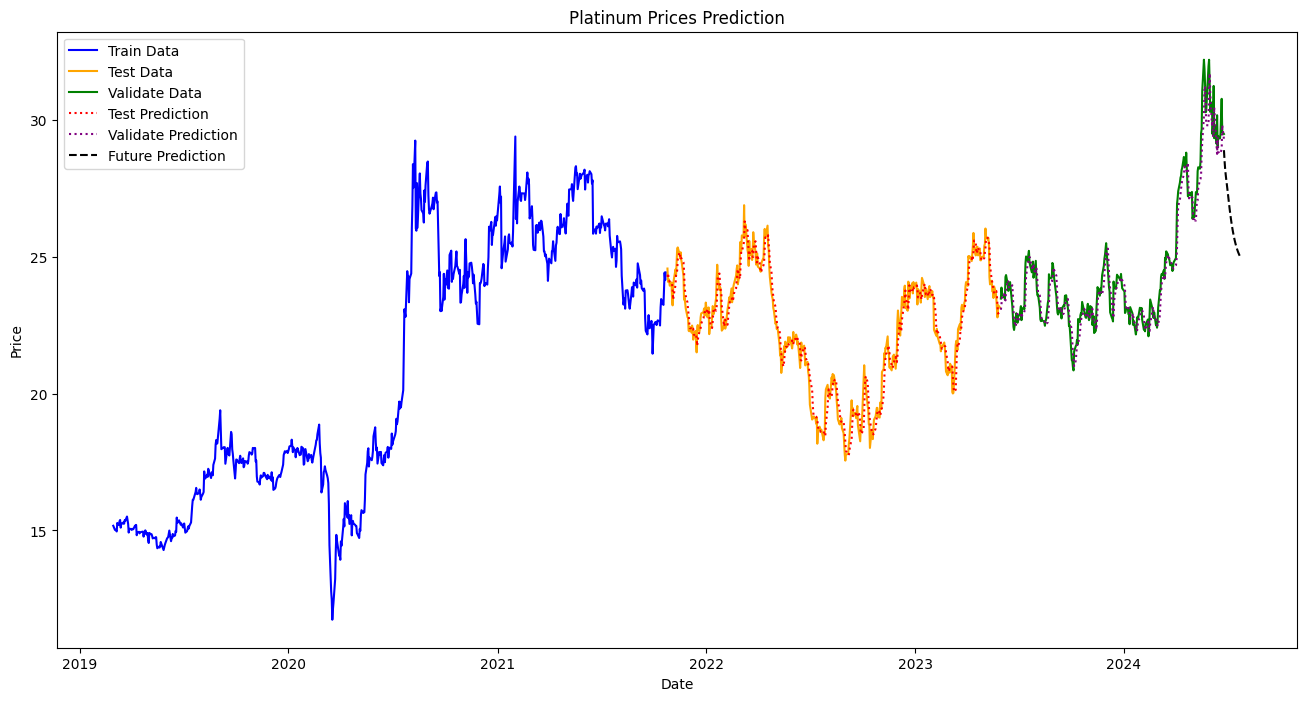

In [55]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

Margin of Error: 2.2562368223360107
Lower Bound of Future Prediction: [[26.64179619]
 [26.27001244]
 [25.97880946]
 [25.75790661]
 [25.57305426]
 [25.39833613]
 [25.2207056 ]
 [25.03715268]
 [24.85044211]
 [24.66544335]
 [24.48667569]
 [24.31724184]
 [24.15867305]
 [24.0112902 ]
 [23.87467723]
 [23.74809965]
 [23.63078146]
 [23.52202477]
 [23.42124635]
 [23.32797403]
 [23.24179176]
 [23.16231398]
 [23.08917465]
 [23.02198579]
 [22.96037525]
 [22.90396604]
 [22.85238601]
 [22.80529353]
 [22.76234941]
 [22.72324864]]
Upper Bound of Future Prediction: [[31.15426984]
 [30.78248609]
 [30.4912831 ]
 [30.27038025]
 [30.08552791]
 [29.91080978]
 [29.73317925]
 [29.54962632]
 [29.36291575]
 [29.177917  ]
 [28.99914933]
 [28.82971548]
 [28.67114669]
 [28.52376384]
 [28.38715088]
 [28.26057329]
 [28.14325511]
 [28.03449841]
 [27.93371999]
 [27.84044768]
 [27.75426541]
 [27.67478762]
 [27.6016483 ]
 [27.53445943]
 [27.4728489 ]
 [27.41643968]
 [27.36485965]
 [27.31776717]
 [27.27482306]
 [27.23572

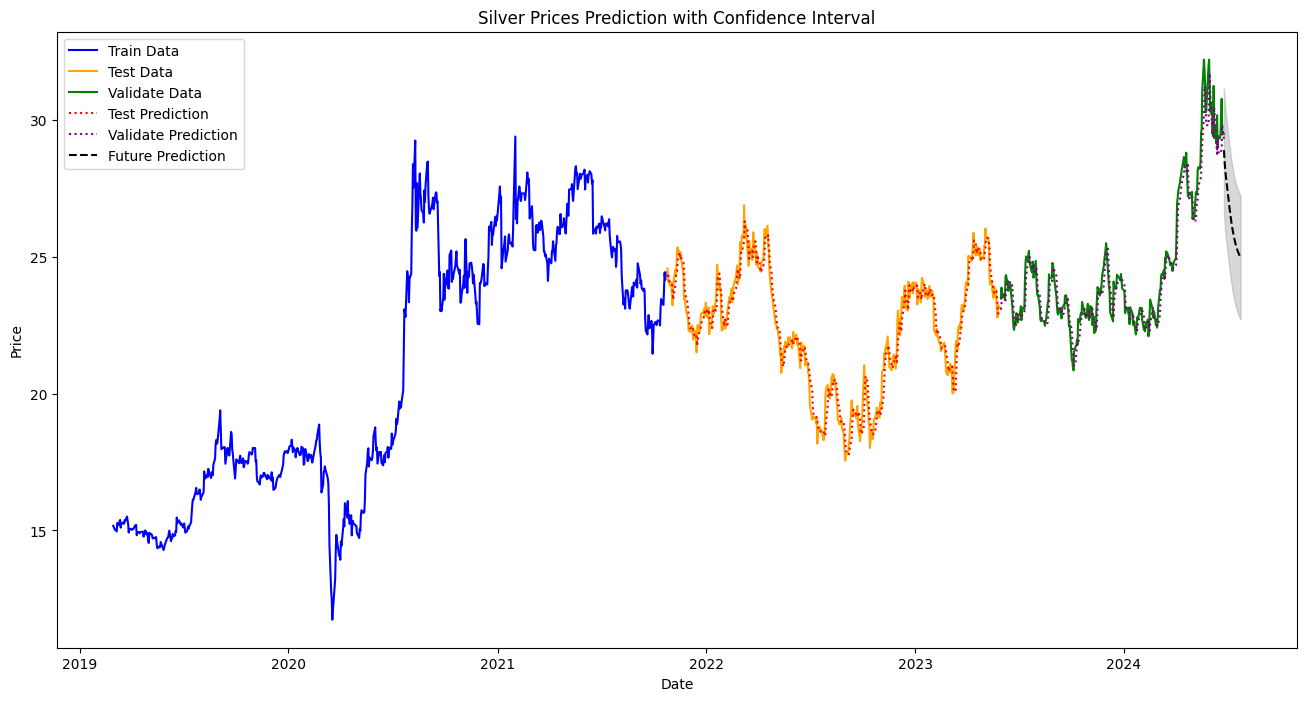

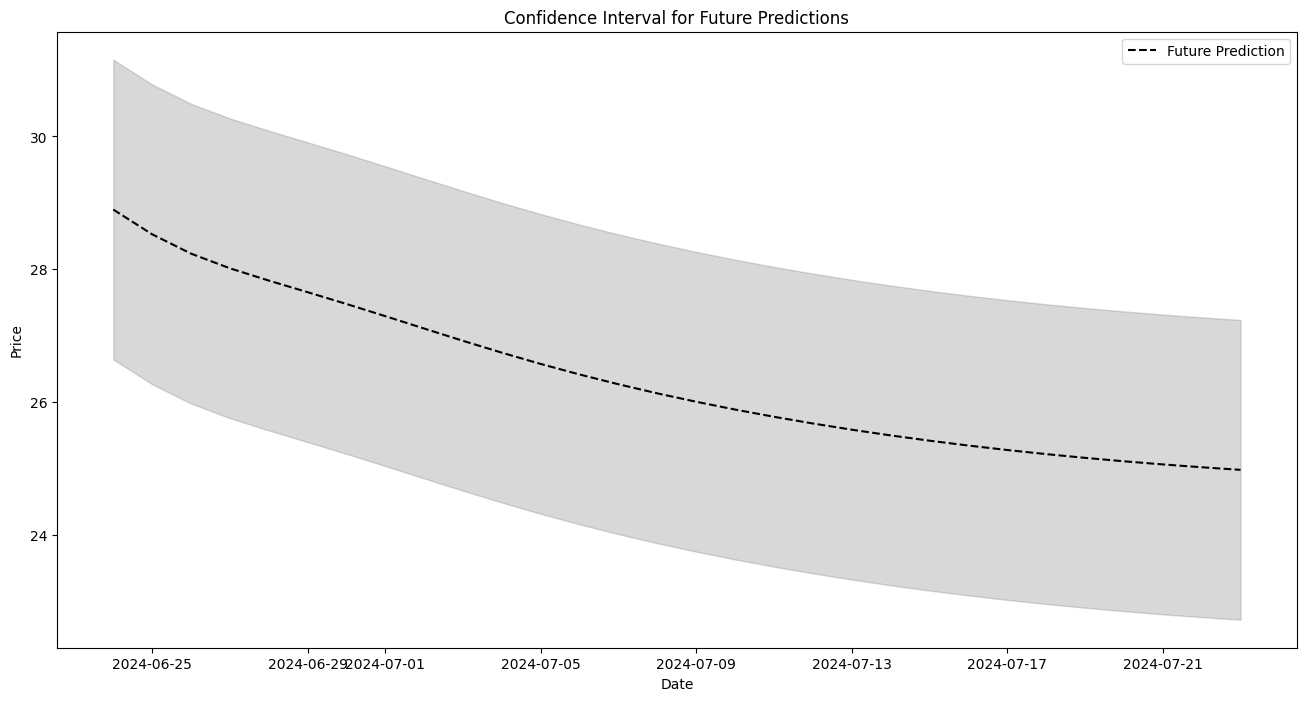

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [57]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.36445153918944095
MAPE:  1.6509069634256974
RMSE:  0.47955493825299206

** Validate **
MAE:  0.4071537345203
MAPE:  1.614242344337163
RMSE:  0.5496208836904376


In [58]:
import pandas as pd

data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [0.3273, 0.5492, 0.3583],
    "Testing MAPE": [1.4044, 2.4954, 1.6216],
    "Testing RMSE": [0.4273, 0.6517, 0.4661],
    "Validation MAE": [0.4529, 0.6503, 0.3717],
    "Validation MAPE": [1.6906, 2.5117, 1.4927],
    "Validation RMSE": [0.6167, 0.7839, 0.4980],
}

df = pd.DataFrame(data)

print(df.to_string(index=False))


Model Ratio  Testing MAE  Testing MAPE  Testing RMSE  Validation MAE  Validation MAPE  Validation RMSE
 LSTM 7-2-1       0.3273        1.4044        0.4273          0.4529           1.6906           0.6167
 LSTM 6-3-1       0.5492        2.4954        0.6517          0.6503           2.5117           0.7839
 LSTM 5-3-2       0.3583        1.6216        0.4661          0.3717           1.4927           0.4980
